In [42]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [43]:
def dbmoon(N=100, d=-5, r=10, w=2):
    w2 = w / 2
    data = np.empty(0)
    while data.shape[0] < N:
        #generate Rectangular data
        tmp_x = 2 * (r + w2) * (np.random.random([N, 1]) - 0.5)
        tmp_y = (r + w2) * np.random.random([N, 1])
        tmp = np.concatenate((tmp_x, tmp_y), axis=1)
        tmp_ds = np.sqrt(tmp_x * tmp_x + tmp_y * tmp_y)
        #generate double moon data ---upper
        idx = np.logical_and(tmp_ds > (r - w2), tmp_ds < (r + w2))
        idx = (idx.nonzero())[0]

        if data.shape[0] == 0:
            data = tmp.take(idx, axis=0)
        else:
            data = np.concatenate((data, tmp.take(idx, axis=0)), axis=0)
    
    db_moon = data[0: N, :]
    #generate double moon data ----down
    data_t = np.empty([N, 2])
    data_t[:, 0] = data[0: N, 0] + r
    data_t[:, 1] = -data[0: N, 1] - d
    db_moon = np.concatenate((db_moon, data_t), axis=0)
    return db_moon

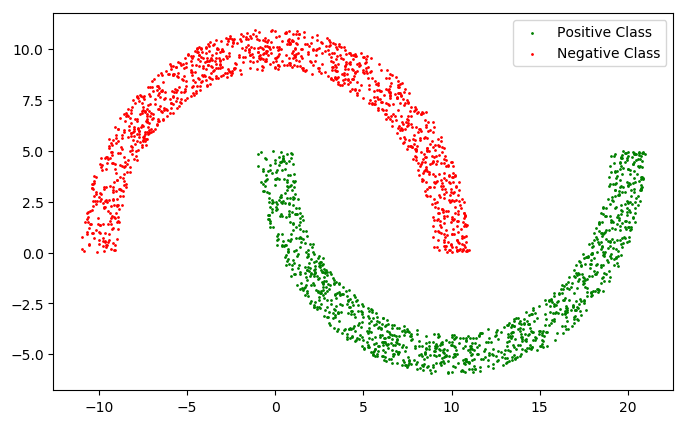

In [44]:
num_example = 2500
x =  dbmoon(N=num_example // 2)
y = np.concatenate([np.ones([num_example // 2]), -np.ones([num_example // 2])])

plt.figure(figsize=(8, 5), dpi=100)
plt.scatter(x[num_example // 2:, 0], x[num_example // 2:, 1], 1, color='green', label='Positive Class')
plt.legend(loc='best')
plt.scatter(x[: num_example // 2, 0], x[: num_example // 2, 1], 1, color='red', label='Negative Class')
plt.legend(loc='best')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

# 将数据集打乱并分为训练集与测试集
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=500)

In [46]:
w = np.zeros([2], dtype=np.float32)
b = 0.

def rosenblatt(x):
    z = np.sum(w * x) + b
    if z >= 0:
        return 1
    else:
        return -1

In [47]:
def mse(label, pred):
    return np.average((np.array(label) - np.array(pred)) ** 2)

In [48]:
# 训练模型 10000 次
train_steps = 10000
# 摘要频率
summary_step = 50
# 摘要，记录训练中的代价变化
summary = np.empty([train_steps // summary_step, 2])
# 学习率
lr = 0.1

for i in range(0, train_steps):
    # 评估模型
    if i % summary_step == 0:
        test_out = []
        for j in range(test_y.shape[0]):
            test_out.append(rosenblatt(test_x[j]))
        loss = mse(test_y, test_out)
        idx = int(i / summary_step)
        summary[idx] = np.array([i, loss])
    
    # 取一个训练集中的样本
    one_x, one_y = train_x[i % train_y.shape[0]], train_y[i % train_y.shape[0]]
    # 得到模型输出结果
    out = rosenblatt(one_x)
    # 更新权值
    w_pre = w
    AME = 0
    
    w = w + lr * (one_y - out) * one_x
    
    for j in range(len(w)):
        AME += pow(w[j]-w_pre[j], 2)
    AME = math.sqrt(AME)
    print(AME)
    while AME < 0.1:
        break
    b = b + lr * (one_y - out)
#     print(i)

0.0
0.4400411506910574
2.177066558085958
0.0
1.3819700029581368
2.146921053648527
0.0
0.34668010992031045
0.0
0.0
0.0
0.0
1.8456516675277455
0.0
0.0
0.0
0.0
0.0
0.19231294386626047
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.177057705230912
0.0
0.0
0.0
0.0
1.8974983995374404
0.0
0.3769518278285093
0.8714129886964267
0.0
0.49336481215937156
0.0
0.0
1.857884002992515
1.8912810823126183
0.0
0.0
0.5111769107691081
0.0
0.0
0.0
0.0
0.0
0.4683900161960192
0.0
0.0
2.0515407750166883
0.0
0.0
1.9319529269207167
2.0328152399051778
0.0
0.0
0.0
0.43874109089149027
0.0
2.000512219462062
0.0
0.0
0.0
2.1312010208055723
0.3731666347088986
0.0
0.0
0.0
0.0
0.0
0.0
4.1963935968209505
0.0
0.0
0.0
0.0
0.0
0.5015839056817725
0.4513936786237027
0.0
0.0
0.0
0.0
0.0
0.0
2.1039860976054308
2.118352769138764
0.0
4.181784962285351
0.0
2.1702717405021565
0.0
0.0
0.0
0.0
0.0
0.9367691442041496
0.0
0.0
1.8723935980075104
0.0
0.5139522494706694
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.8145831880166521
0.0
0.0
2.008368760296055
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.2041868568181195
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.8491175171520844
0.0
0.0
4.222769989071676
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.9477408361424629
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9120323653445601
0.0
0.0
0.0
0.683883534630315
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.9725072440871134
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.7281961120850128
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.1649252598821405
0.0
0.735249397787685
0.0
0.0
0.0
0.0
3.6794119271787147
0.0
0.0
0.0
0.0
1.9443865589165747
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4260757069439102
0.0
0.0
0.5892727006916944
0.0
0.0
0.0
1.8480131515314326
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.070542947279174
2.071044251777315
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.03686307403341
0.0
0.0


0.0
0.5802115837726568
0.0
0.0
2.173997240786557
0.0
0.0
0.3908028942850038
0.0
0.0
0.0
0.0
4.093173562262508
0.0
0.0
2.0524726948463283
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.1545098339000925
0.0
3.97465058313791
0.0
0.0
0.0
0.0
0.0
2.1091111601389874
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.889222262961544
0.0
0.8146665138964584
0.0
0.0
0.0
0.0
0.4151775854198469
1.9488850261840642
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.33502613636149164
0.7973563203404542
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.9160335786628977
0.0
0.0
1.911341413084585
0.5006762361984534
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.165444801448021
2.1696210321990446
0.0
2.078641064764156
0.0
0.0
0.9942896128859146
0.0
0.6433960337285402
1.8016046877634597
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.864863153722

0.0
0.685325799292629
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9026407499162676
0.0
1.9402338376264932
0.0
0.0
4.078620834476077
0.0
1.8542222370962236
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.1248290709803084
0.0
0.0
0.0
0.0
0.0
0.0
1.8538290586747697
0.3769820884023374
0.9492147022583485
0.0
4.061793900735729
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.1718383069676532
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8116408874749128
0.0
0.0
2.1407118644759855
0.0
0.0
0.41091055420676387
3.203168360766585
0.0
0.0
0.5521988156078901
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.186374987263627
0.0
0.0
0.0
1.9177586173200512
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.198730967178308
0.0
0.0
0.0
0.0
1.848212030433602
0.0
0.0
0.0
0.0
0.0
0.0
1.849694504450626
0.0
4.018416472962744
0.0
0.0
0.0
0.0
2.146077786175871
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.9368904523165398
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.94382870916

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.3646839882460895
0.0
0.0
2.180161349881909
0.0
0.0
0.0
0.0
0.0
0.0
4.0444287431887
0.0
0.0
2.163949537800571
0.0
0.0
0.0
0.1983748461116905
0.0
0.0
0.0
0.0
0.0
0.7838130211410906
0.3788018416384204
2.012927764997422
0.0
0.0
0.0
0.0
0.0
0.0
3.518296782428231
1.889221709113619
0.0
0.5207812863152701
0.0
0.0
0.0
0.0
0.0
0.0
1.9165685451253591
4.045215916729508
0.0
2.1607075813696004
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.002488735185151
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.192820058928275
3.8209051243999905
2.0983694533017534
0.0
0.0
0.0
0.0
0.0
2.0035474397484627
3.7617853823650815
2.174050141412713
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8145831880166525
0.4434616669309322
0.0
0.0
0.0
0.0
0.0
0.0
2.004423229341783
0.0
0.0
0.0
0.0
3.2041868568181195
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.9477408361424629
0.0
0.0
0.0
4.087345603

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.3646839882460896
0.0
0.0
2.180161349881909
0.0
0.0
0.0
0.0
0.0
0.0
4.0444287431887
0.0
0.0
2.163949537800571
0.0
0.0
0.0
0.0
0.0
2.174035693145467
0.0
0.0
0.0
0.7838130211410906
0.3788018416384208
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5207812863152701
0.0
0.0
3.88879855050221
0.0
0.0
0.0
1.9165685451253591
0.0
0.0
2.1607075813696004
0.0
0.0
0.0
4.1907796835738615
0.0
0.0
0.0
0.0
0.0
1.0024887351851515
0.0
2.0883235297001788
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.192820058928275
0.0
2.0983694533017534
0.0
0.0
0.0
3.5319021346705965
0.0
2.0035474397484627
3.7617853823650815
2.174050141412713
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8145831880166525
0.44346166693093214
0.0
2.008368760296055
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.940229638241603
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.9477408361424629
0.0
0.0
0.0
4.08734560310699
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

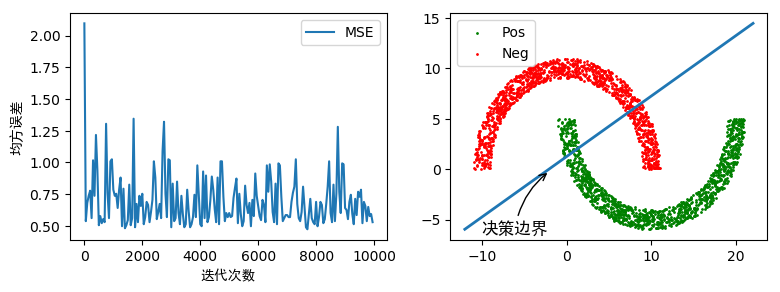

In [49]:
plt.figure(figsize=(9, 3), dpi=100)

plt.subplot(1, 2, 1)
plt.plot(summary[:, 0], summary[:, 1], label='MSE')
plt.legend(loc='best')
plt.xlabel('迭代次数', fontproperties='SimHei')
plt.ylabel('均方误差', fontproperties='SimHei')

plt.subplot(1, 2, 2)
plt.scatter(x[num_example // 2:, 0], x[num_example // 2:, 1], 1, color='green', label='Pos')
plt.legend(loc='best')
plt.scatter(x[: num_example // 2, 0], x[: num_example // 2, 1], 1, color='red', label='Neg')
plt.legend(loc='best')
left_coord_y = (-b - (-12) * w[0]) / w[1]
right_coord_y = (-b - (22) * w[0]) / w[1]
plt.plot([-12, 22], [left_coord_y, right_coord_y], linewidth=2)

plt.annotate(
    '决策边界', xy=(-2, -0.2), xytext=(-10., -6.5), 
     arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), 
     fontproperties='SimHei', fontsize=12)

plt.show()